In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.VERSION)
print(tf.keras.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('OK')

1.12.0
2.1.6-tf
OK


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(  type(train_images),
    
        train_images.shape,
      
        type(train_labels),
     
        len(train_labels),
      
        '\n',

        train_labels,

        test_images.shape,

        len(test_labels)
     )


<class 'numpy.ndarray'> (60000, 28, 28) <class 'numpy.ndarray'> 60000 
 [9 0 0 ... 3 0 5] (10000, 28, 28) 10000


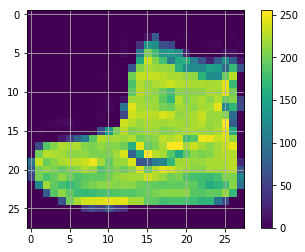

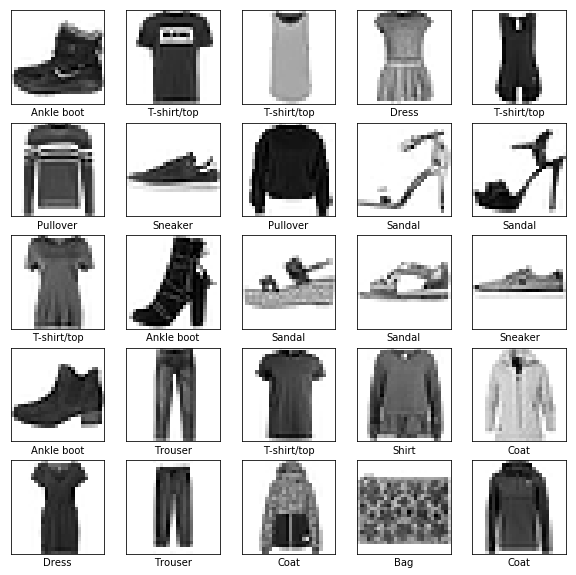

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [5]:
X_dim = len(train_images.shape)
print('X_dim=',X_dim,'\t',train_images.shape,'\t',test_images.shape)

if X_dim == 3:
    train_images = train_images[:,:,:, np.newaxis]
    test_images = test_images[:,:,:,np.newaxis]

    X_dim = len(train_images.shape)
    print('X_dim=',X_dim,'\t',train_images.shape,'\t',test_images.shape)

X_dim= 4 	 (60000, 28, 28, 1) 	 (10000, 28, 28, 1)


In [6]:
model = keras.Sequential([
    keras.layers.Convolution2D(input_shape=(28, 28, 1),filters=8, kernel_size=3, strides=1, padding='SAME', activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2) , padding='SAME'),  
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 第一种训练方法
model.fit(x=train_images,  y=train_labels, 
          batch_size=64, epochs=1,
          shuffle=True)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/1
28800/60000 [=============>................] - ETA: 4s - loss: 0.4474 - acc: 0.8407

In [ ]:

dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset = dataset.batch(32).repeat().shuffle(buffer_size=10000)

In [15]:
# 第二种训练方法:

model.fit(dataset, epochs=1, steps_per_epoch=100)
# epochs:训练几次，steps_per_epoch：每次消耗几个batc_data，
# 尽量让每1次epochs训练的图片个数（实际=steps_per_epoch（1000） * batch_size（64））=图片总数（60000）
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/1
10000/10000 [==============================] - 1s 104us/step
Test accuracy: 0.8237


In [16]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[2.2256312e-14 1.6848820e-14 1.0801272e-11 3.0234265e-15 3.0488184e-12
 1.5652698e-05 1.2027953e-17 1.9736604e-05 7.3071743e-14 9.9996459e-01]
9
9


In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [19]:
X_dim = len(train_images.shape)
print(X_dim,'\t',train_images.shape,'\t',test_images.shape)

if X_dim == 4:
    train_images = np.squeeze(train_images)
    test_images = np.squeeze(test_images)
X_dim = len(train_images.shape)
print(X_dim,'\t',train_images.shape,'\t',test_images.shape)

4 	 (60000, 28, 28, 1) 	 (10000, 28, 28, 1)
3 	 (60000, 28, 28) 	 (10000, 28, 28)


NameError: name 'class_names' is not defined

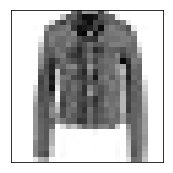

In [20]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

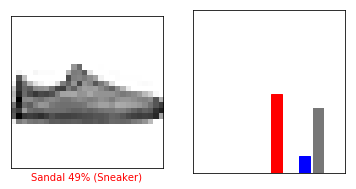

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

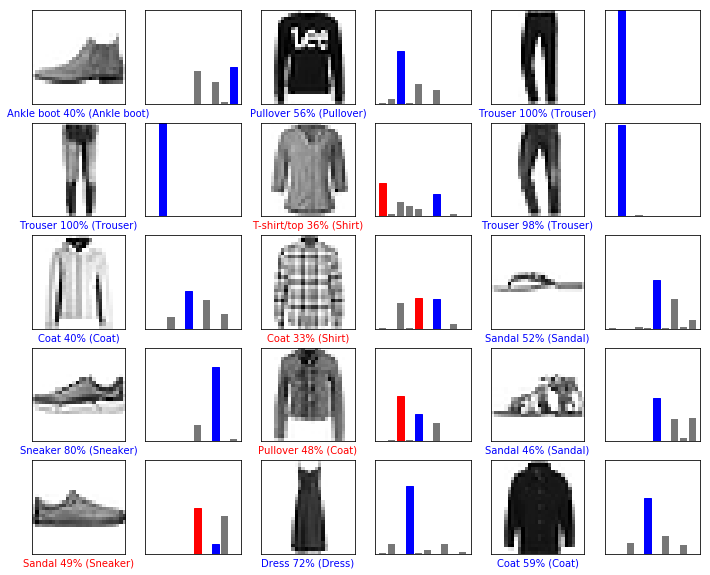

In [39]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [16]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [17]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [18]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.6582451e-09 2.3873514e-10 4.3585352e-10 5.5791136e-12 8.3851558e-11
  7.5300272e-06 1.9852755e-09 3.3058899e-03 5.5700816e-10 9.9668664e-01]]


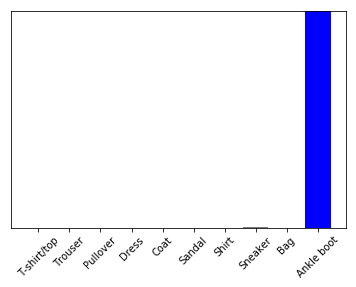

In [19]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [20]:
np.argmax(predictions_single[0])

9